In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [421]:
# Load Data

df = pd.read_csv("Updated_HD_Data")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Linear Regression

In [444]:
# Set the X and y variables with corresponding data

y = df['target']
X = df.drop(columns = ['target'], axis = 1)

In [445]:
# Check to make sure X does not have target 

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [446]:
# Add the constant

X = sm.add_constant(X)
X

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,1.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,1.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,1.0,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,1.0,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,1.0,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [447]:
# Initialize the OLS method

model = sm.OLS(y,X)

In [448]:
# Fit the model

model = model.fit()

In [449]:
# Identifying important features

params = model.params
params.sort_values()

sex        -0.195996
exang      -0.144046
thal       -0.119039
ca         -0.100602
oldpeak    -0.058789
trestbps   -0.001991
age        -0.000820
chol       -0.000354
thalach     0.003019
fbs         0.017374
restecg     0.049848
slope       0.078979
cp          0.112703
const       0.828899
dtype: float64

In [450]:
# Get the results from our model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.49e-38
Time:                        16:16:02   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8289      0.293      2.830      0.005       0.252       1.405
age           -0.0008      0.003     -0.304      0.761      -0.006       0.004
sex           -0.1960      0.047     -4.157      0.000      -0.289      -0.103
cp             0.1127      0.022      5.036      0.000       0.069       0.157
trestbps      -0.0020      0.001     -1.583      0.114      -0.004       0.000
chol          -0.0004      0.000     -0.838      0.403      -0.001       0.000
fbs            0.0174      0.060      0.291      0.771      -0.100       0.135
restecg        0.0498      0.040      1.249      0.213      -0.029       0.128
thalach        0.0030      0.001      2.671      0.008       0.001       0.005
exang         -0.1440      0.051     -2.804      0.005      -0.245      -0.043
oldpeak       -0.0588      0.023     -2.564      0.011      -0.104      -0.014
slope          0.0790      0.042      1.863      0.063      -0.004       0.162
ca            -0.1006      0.022     -4.603      0.000      -0.144      -0.058
thal          -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [451]:
line = LinearRegression().fit(X,y)

In [452]:
line.score(X,y)

0.5175499644256842

In [453]:
pred_X = line.predict(X)

Text(0.5, 1.0, 'Regressive Curve of Preditive Data')

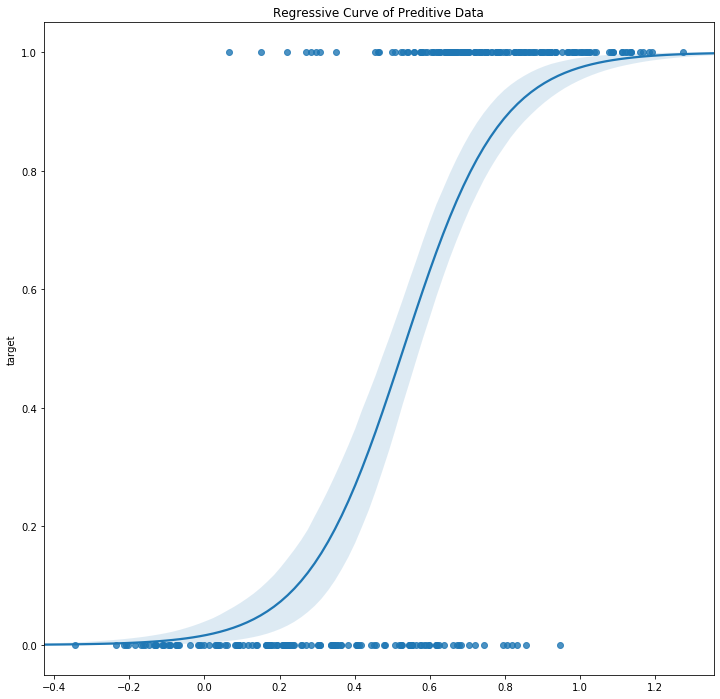

In [454]:
# Graph the results to visualize the regression line

fig = plt.figure(figsize=(12, 12))
sns.regplot(x=pred_X, y=y, logistic = True).set_title('Regressive Curve of Preditive Data')